In [201]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs



'''cap = pd.read_csv("/Users/houzhuo/Downloads/capdata3.csv")
robot    = pd.read_csv("/Users/houzhuo/Downloads/robot.csv")
full = pd.concat([cap,robot],axis=1)
full.head()
#cap_head = pd.concat(cap_headx,cap_heady,cap_headz)
dataset = pd.concat( [full['55']/180,full['56']/180,full['57']/180,full['Wrist_L']/5600 ] , axis=1 )
dataset.head()
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()'''

import pandas as pd
f1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/07_03.csv")

cap = pd.concat([f1,f2,f3,f4,f5,f6,f7],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/test3.csv")

rob = pd.concat([t1,t2,t3,t4,t5,t6,t7],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()

t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")
test = pd.concat([f8,t8],axis=1)

(1329, 44) (1329, 18) (1329, 26)


                 4            5            6           13           14  \
count  1329.000000  1329.000000  1329.000000  1329.000000  1329.000000   
mean     -0.041723     0.143947    -0.077285    -0.046368    -0.150605   
std       0.023149     0.052795     0.024582     0.033108     0.072971   
min      -0.135550     0.037363    -0.146450    -0.183628    -0.400922   
25%      -0.050701     0.109928    -0.091472    -0.060883    -0.192128   
50%      -0.037462     0.139006    -0.076306    -0.039012    -0.142911   
75%      -0.026703     0.170344    -0.061400    -0.022062    -0.095917   
max      -0.006554     0.323989    -0.021544    -0.001826    -0.012077   

                15      Elbow_R  
count  1329.000000  1329.000000  
mean      0.079050     0.271140  
std       0.032603     0.047389  
min       0.007017     0.121964  
25%       0.053968     0.243329  
50%       0.078244     0.271551  
75%       0.101389     0.302098  
max       0.157300     0.424821  
                4          

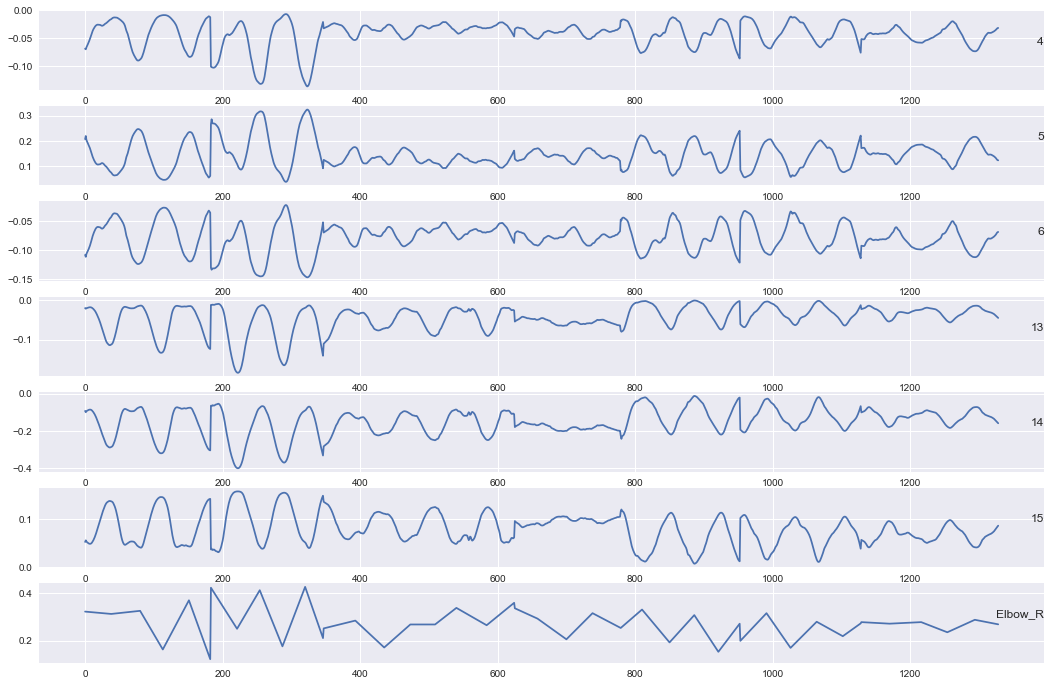

0      0.300000
1      0.300000
2      0.300000
3      0.300000
4      0.300000
5      0.300000
6      0.300000
7      0.300000
8      0.300000
9      0.300000
10     0.300000
11     0.300000
12     0.300000
13     0.300000
14     0.300000
15     0.300000
16     0.300000
17     0.300000
18     0.300000
19     0.300000
20     0.300000
21     0.300000
22     0.300000
23     0.300000
24     0.300000
25     0.300000
26     0.300000
27     0.300000
28     0.300000
29     0.300000
         ...   
162    0.296232
163    0.296935
164    0.297638
165    0.298342
166    0.299045
167    0.299749
168    0.300452
169    0.301155
170    0.301859
171    0.302562
172    0.303265
173    0.303969
174    0.304672
175    0.305375
176    0.306079
177    0.306782
178    0.307485
179    0.308189
180    0.308892
181    0.309595
182    0.310299
183    0.311002
184    0.311706
185    0.312409
186    0.313112
187    0.313816
188    0.314519
189    0.315222
190    0.315926
191    0.316629
Name: Elbow_R, Length: 1

In [209]:
#dataset = pd.concat([full['1']/180,full['2']/180,full['3']/180,full['4']/180,full['5']/180,full['6']/180,full['7']/180,full['8']/180,full['9']/180,
#                     full['10']/180,full['11']/180,full['12']/180,full['13']/180,full['14']/180,full['15']/180,full['16']/180,full['17']/180,full['18']/180,full['Hand_R']/5600] , axis=1 )
dataset = pd.concat([full['4']/180,full['5']/180,full['6']/180,full['13']/180,full['14']/180,full['15']/180,full['Elbow_R']/5600 ], axis=1 )
dataset.head()
print(dataset.describe())

dataset_test = pd.concat([test['4']/180,test['5']/180,test['6']/180,test['13']/180,test['14']/180,test['15']/180,test['Elbow_R']/5600 ], axis=1 )
print(dataset_test.describe())

groups = [0, 1, 2, 3,4,5,6]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(dataset.values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
dataset_test['Elbow_R']

In [214]:
for end in np.linspace(0.132, 0.43, num=10):
    print(end)
    df_range = dataset[(np.absolute(dataset['Elbow_R']) >= start) & (np.absolute(dataset['Elbow_R']) < end)]
    print(df_range.shape[0])
balanced

0.11
0
0.15571428571428572
6
0.20142857142857143
105
0.24714285714285716
363
0.29285714285714287
941
0.3385714285714286
1245
0.3842857142857143
1301
0.43
1329


""


0.132
2
0.16511111111111113
11
0.19822222222222224
80
0.23133333333333334
158
0.2644444444444445
275
0.2975555555555556
446
0.33066666666666666
251
0.36377777777777776
60
0.3968888888888889
29
0.43
17


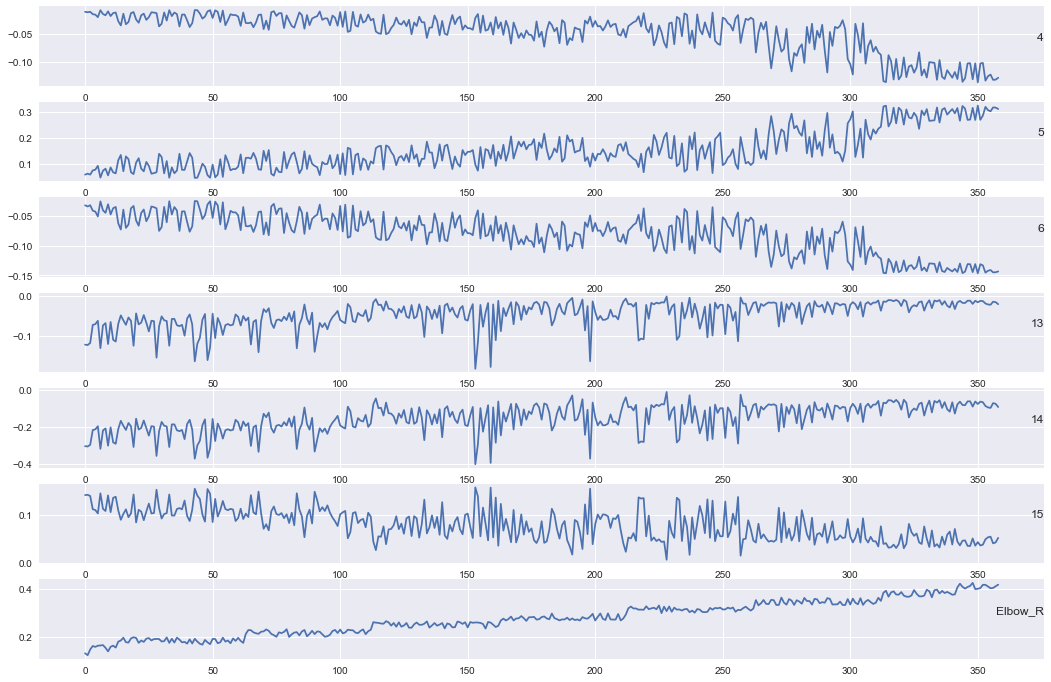

(359, 7)

In [215]:
balanced = pd.DataFrame()   # Balanced dataset
bins =   10               # N of bins
bin_n = 50                 # N of examples to include in each bin (at most)

start = 0.12
for end in np.linspace(0.132, 0.43, num=bins):
    print(end)
    df_range = dataset[(np.absolute(dataset['Elbow_R']) >= start) & (np.absolute(dataset['Elbow_R']) < end)]
    print(df_range.shape[0])
    range_n = min(bin_n, df_range.shape[0])
    balanced = pd.concat([balanced, df_range.sample(range_n)])
    start = end
balanced

import matplotlib.pyplot as plt
values = balanced.values
# specify columns to plot
groups = [0, 1, 2, 3,4,5,6]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
values.shape

In [170]:
values.shape

(354, 7)

In [216]:
from sklearn import preprocessing
values = dataset.values
#values = dataset.astype(np.float32)
n_features=6
#for i in range(4):
#    scaled[:,i] =values[:,i] - np.mean(values[:,i], axis = 0)

#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

#for i in reversed(range(scaled.shape[1]-4)):
#    scaled[:,i+3] = scaled[:,i+3] - scaled[:,i]



#数据标准化   应该不适用，不是一个正常的分布
#ss_x = preprocessing.StandardScaler()  
#values = ss_x.fit_transform(dataset) 



#train = values[:300,:]
#val = values[300:,:]

test = dataset_test.values


n_obs = n_features
train_X,train_y = values[:,:n_obs],values[:,-1]
test_X,test_y = test[:,:n_obs],test[:,-1]
#val_X,val_y = val[:,:n_obs],val[:,-1]#第一个多少行

print(train_X.shape,test_X.shape)

(1329, 6) (192, 6)


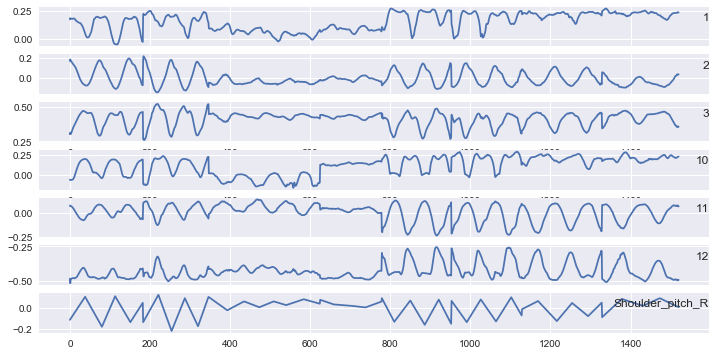

In [172]:
values
groups = [0, 1, 2, 3,4,5,6]
i=1
plt.figure(figsize=(12,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [217]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection


In [218]:
rf = RandomForestRegressor(n_estimators=190, 
                           max_features= 'sqrt',verbose= 0 )
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [219]:
print('5-fold cross validation:\n')
stack = StackingCVRegressor(regressors=(rf,xgb,ENet, KRR,lgb, gbm), 
                          meta_regressor=ENet)
'''
for clf, label in zip([rf,xgb, ENet, KRR, gbm,  stack], 
                      ['rf',
                       'XGBRegressor', 
                       'ENet', 
                       'KRR',
                       'gbm',
                       
                       'stack']):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
    scores = np.sqrt(-model_selection.cross_val_score(clf, train_X, train_y, 
                                              cv=kf,scoring='neg_mean_squared_error'))
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))
'''

5-fold cross validation:



'\nfor clf, label in zip([rf,xgb, ENet, KRR, gbm,  stack], \n                      [\'rf\',\n                       \'XGBRegressor\', \n                       \'ENet\', \n                       \'KRR\',\n                       \'gbm\',\n                       \n                       \'stack\']):\n    n_folds = 5\n    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)\n    scores = np.sqrt(-model_selection.cross_val_score(clf, train_X, train_y, \n                                              cv=kf,scoring=\'neg_mean_squared_error\'))\n    print("Accuracy: %0.4f (+/- %0.4f) [%s]" \n          % (scores.mean(), scores.std(), label))\n'

In [81]:

#Validation function
n_folds = 5
#def rmsle_cv(model):
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
score= np.sqrt(-cross_val_score(stack, train_X, train_y, scoring="neg_mean_squared_error", cv = kf))
#return(rmse)
#score = rmsle_cv(lasso)
print("\n stack score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 stack score: 0.0359 (0.0034)



In [27]:
#sclf.fit(train_X,train_y)


NameError: name 'sclf' is not defined

In [220]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
stack.fit(train_X, train_y)
#sclf_pred = sclf.predict(X_train.values)
stack_train_pred = stack.predict(train_X)
stack_pred = stack.predict(test_X)
print(rmsle(train_y, stack_train_pred))

0.016630322823743767


In [221]:
test_y

array([0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.29981469, 0.29962938, 0.29944407, 0.29925876, 0.29907345,
       0.29888814, 0.29870283, 0.29851752, 0.29833221, 0.2981469 ,
       0.29796159, 0.29777628, 0.29759097, 0.29740566, 0.29722035,
       0.29703504, 0.29684973, 0.29666442, 0.29647911, 0.2962938 ,
       0.29610849, 0.29592318, 0.29573787, 0.29555256, 0.29536

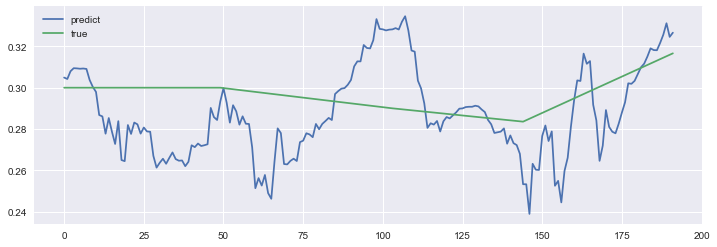

In [222]:
plt.figure()
plt.plot(stack_pred, label = 'predict')
plt.plot(test_y, label = 'true')
plt.legend()
plt.show()